In [6]:
import pandas as pd
import pyarrow as pa

import numpy as np
import random
import string
import matplotlib.pyplot as plt

In [ ]:
string.ascii_letters

In [20]:
random.random()

0.08253781949182015

## Generate data

In [32]:
def generate_str(string_len=10):
    return ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(string_len))

def generate_row(types_list): 
    result = list()
    for t, param in types_list:
        if t == "str": 
            result += [generate_str(param)]
        elif t == "int":
            result += [random.randint(param[0], param[1])]
        elif t == "float":
            result += [random.random()*param]
        else: 
            raise ValueError('Wrong type')
    return result
            

In [43]:
table_arc[-1]

('str', 75)

In [46]:

# generated_data

In [ ]:
CSV write/ read
100: 1.31 ms ± 74.1 /1.83 ms ± 110 µs
1_000: 6.35 ms ± 516 µs/4.25 ms ± 723 µs
10_000: 56.3 ms ± 1.84 ms/22 ms ± 1.03 ms
100_000: 563 ms ± 14.5 ms/229 ms ± 17.4 ms / 9Mb
1_000_000: 

In [183]:
benchmarks = dict (
    {"CSV": 
     {100: {"write, ms": (1.31, 0.074), "read, ms": (1.83, 0.110), "size": 0.001}, 
      1_000: {"write, ms": (6.35, 0.516), "read, ms": (4.25, 0.723), "size": 0.093 }, 
      10_000: {"write, ms": (56.3, 1.84), "read, ms": (22, 1.03), "size": 0.931}, 
      100_000: {"write, ms": (563, 14.5), "read, ms": (229, 17.4), "size": 9}, 
      1_000_000: {"write, ms": (5690, 283), "read, ms": (2110, 67.6), "size": 94} }, 
     "feather": 
     {100: {"write, ms": (0.935, 0.080), "read, ms":(1.86, 0.103), "size": 0.012}, 
      1_000: {"write, ms": (2.08, 0.089), "read, ms":  (2.54, 0.285), "size": 0.085 }, 
      10_000: {"write, ms": (4.68, 0.64), "read, ms":  (8.45, 1.13), "size": 0.8}, 
      100_000: {"write, ms": (29.5, 1.53), "read, ms":  (86.2, 5.7), "size": 8.2}, 
      1_000_000: {"write, ms": (289, 16.6), "read, ms":  (1050, 25.7), "size": 82} },
     "h5": 
     {100: {"write, ms": (20.3, 1.1), "read, ms":  (10.9, 0.831), "size": 1}, 
      1_000: {"write, ms": (20.3, 0.456), "read, ms":(11.4, 0.699), "size": 1.29}, 
      10_000: {"write, ms": (23.4, 0.593), "read, ms":  (18.3, 0.651), "size": 1.96}, 
      100_000: {"write, ms": (152, 9.84), "read, ms":  (116, 1.8), "size": 10.3 }, 
      1_000_000: {"write, ms": (1430, 111), "read, ms":  (1010, 21.9), "size": 101} },
     })

In [122]:
table_arc = [('str', 10), ('int', (-10, 200)), ('float', 5), ]

generated_data = [generate_row(table_arc + [('str', random.randint(10, 100))]) 
                  for _ in range(100)]

df = pd.DataFrame(generated_data, columns=['a', 'b', 'c', 'd'])
len(df)

100

In [96]:
# df = pd.read_csv("../data/table.csv")
# len(df)

1000000

In [118]:
%%timeit -n 10
df.to_hdf('../data/data.h5', key='dataset', mode='w')

23.7 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [116]:
%%timeit -n 100
df = pd.read_hdf('../data/data.h5')

10.7 ms ± 710 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
%%timeit -n 200
df.to_feather("../data/data.feather")

2.09 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 200 loops each)


In [92]:
%%timeit -n 200
df = pd.read_feather("../data/data.feather")

1.86 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 200 loops each)


In [124]:
%%timeit -n 1
df.to_csv("../data/table.csv")

2.62 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
%%timeit
df = pd.read_csv("../data/table.csv")

2.11 s ± 67.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


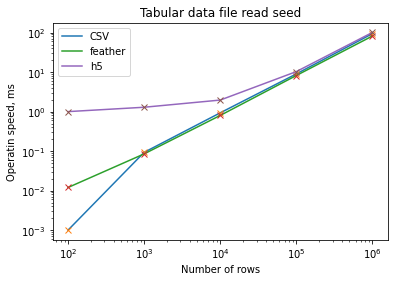

In [184]:
for dt_type, stat in benchmarks.items():
    arr_w = np.array([[sz, dt['write, ms'][0]-dt['write, ms'][1], 
                       dt['write, ms'][0]+dt['write, ms'][1] ]
                      for sz, dt in stat.items()])
    arr_r = np.array([[sz, dt['size'] ]
                      for sz, dt in stat.items()])
    arr_w = arr_r

    plt.plot(arr_w[:,0], arr_w[:,1], label=dt_type)
    plt.plot(arr_w[:,0], arr_w[:,1], 'x')

#     plt.fill_between(arr_w[:,0], arr_w[:,1], arr_w[:,2], color='r', alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of rows")
plt.ylabel("Operatin speed, ms")
plt.legend()
plt.title("Tabular data file read seed")
plt.show()

In [137]:
benchmarks['CSV'].items()

dict_items([(100, {'write, ms': (1.31, 0.074), 'read, ms': (1.83, 0.11), 'size': 0.001}), (1000, {'write, ms': (6.35, 0.516), 'read, ms': (4.25, 0.723), 'size': 0.093}), (10000, {'write, ms': (56.3, 1.84), 'read, ms': (22, 1.03), 'size': -0.931}), (100000, {'write, ms': (563, 14.5), 'read, ms': (229, 17.4), 'size': 9}), (1000000, {'write, ms': (5690, 283), 'read, ms': (2110, 67.6), 'size': 94})])